In [229]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [230]:
df=pd.read_csv('Error.csv')

In [231]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [232]:
df

QId       Library  QPostTypeId  QAcceptedAnswerId  QOwnerUserId  \
0     67493977  react-native            1                  0       5078763   
1     54612767  react-native            1                  0       6794795   
2     61742807  react-native            1                  0       4017142   
3     58782446  react-native            1                  0      11346397   
4     73510080  react-native            1           73510203      14533051   
...        ...           ...          ...                ...           ...   
1925  60405154       angular            1           60405220       8592095   
1926  47446698       angular            1                  0       2467497   
1927  52289544       angular            1                  0       5725609   
1928  46213469       angular            1                  0       5362646   
1929  68833783       angular            1                  0      16697199   

      QAnswerCount  QCommentCount  QFavoriteCount  QCommunityOwnedDate  \
0                1              0               0                    0   
1                2              0               0                    0   
2                1              1               0                    0   
3                0             11               0                    0   
4                1              6               0                    0   
...            ...            ...             ...                  ...   
1925             1              0               0                    0   
1926             1              0               0                    0   
1927             0              0               0                    0   
1928             0              2               0                    0   
1929             1              6               0                    0   

                QCreationDate  ...  \
0     2021-05-11T20:34:35.273  ...   
1     2019-02-10T02:19:26.823  ...   
2     2020-05-12T02:35:26.833  ...   
3     2019-11-09T18:47:23.977  ...   
4     2022-08-27T10:09:17.017  ...   
...                       ...  ...   
1925  2020-02-26T00:31:57.300  ...   
1926  2017-11-23T02:34:42.107  ...   
1927  2018-09-12T07:18:39.980  ...   
1928  2017-09-14T07:52:30.267  ...   
1929  2021-08-18T13:54:14.980  ...   

                                              Link  Why What  How Other  \
0                                              NaN    1    0  0.0   0.0   
1                                              NaN    1    0  0.0   0.0   
2                                              NaN    0    1  0.0   0.0   
3                                              NaN    0    0  1.0   0.0   
4                                              NaN    1    0  0.0   0.0   
...                                            ...  ...  ...  ...   ...   
1925  https://stackoverflow.com/questions/60405154    0    0  0.0   1.0   
1926  https://stackoverflow.com/questions/47446698    0    0  1.0   0.0   
1927  https://stackoverflow.com/questions/52289544    0    0  1.0   0.0   
1928  https://stackoverflow.com/questions/46213469    0    0  0.0   1.0   
1929  https://stackoverflow.com/questions/68833783    0    1  0.0   0.0   

      Category                                               Tags  \
0         High                      react-native,material-ui,expo   
1          Low                            javascript,react-native   
2          Low                                       react-native   
3          Mid  javascript,firebase,react-native,google-cloud-...   
4          Low                 react-native,react-native-flatlist   
...        ...                                                ...   
1925       Low   angular,select,binding,angular-material,angular8   
1926       Mid                                     angular,routes   
1927       Low                           angular,npm,multi-select   
1928      High                            angular,docker,keycloak   
1929       Low                                      angular,forms   

# Pie and Bar Chart of 6 Top Most Error Type

C:\Users\mzaki\AppData\Local\Temp\ipykernel_11400\1833956965.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdBu')


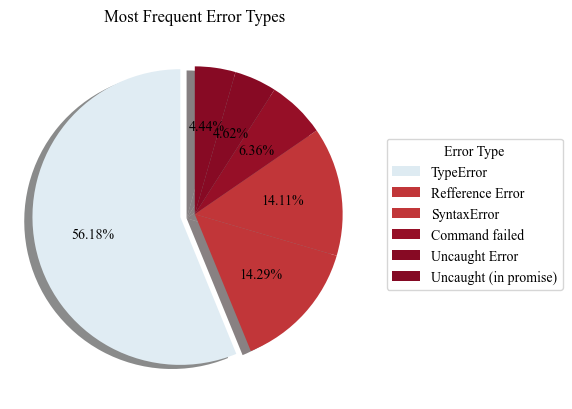

In [337]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
error_counts = df['Type'].value_counts().head(6)
cmap = cm.get_cmap('RdBu') 
normalized_data = error_counts / sum(error_counts)
explode = [0.1 if p == max(normalized_data) else 0 for p in normalized_data]
plt.pie(error_counts, labels=None, colors=cmap(normalized_data),autopct='%1.2f%%',explode=explode,  shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9},startangle=90,textprops={'color': 'black'})
plt.legend(wedges, ingredients,
          title="Error Type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Most Frequent Error Types')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 10
plt.show()

In [235]:
Type=df['Type'].value_counts()
print(Type)

Type
TypeError              645
ReferenceError         164
SyntaxError            162
Command failed          73
Uncaught Error          53
                      ... 
Cannot find module       1
InvalidPipeArgument      1
Unrecognized tag         1
OutOfMemoryError         1
NOT SUPPORTED            1
Name: count, Length: 92, dtype: int64


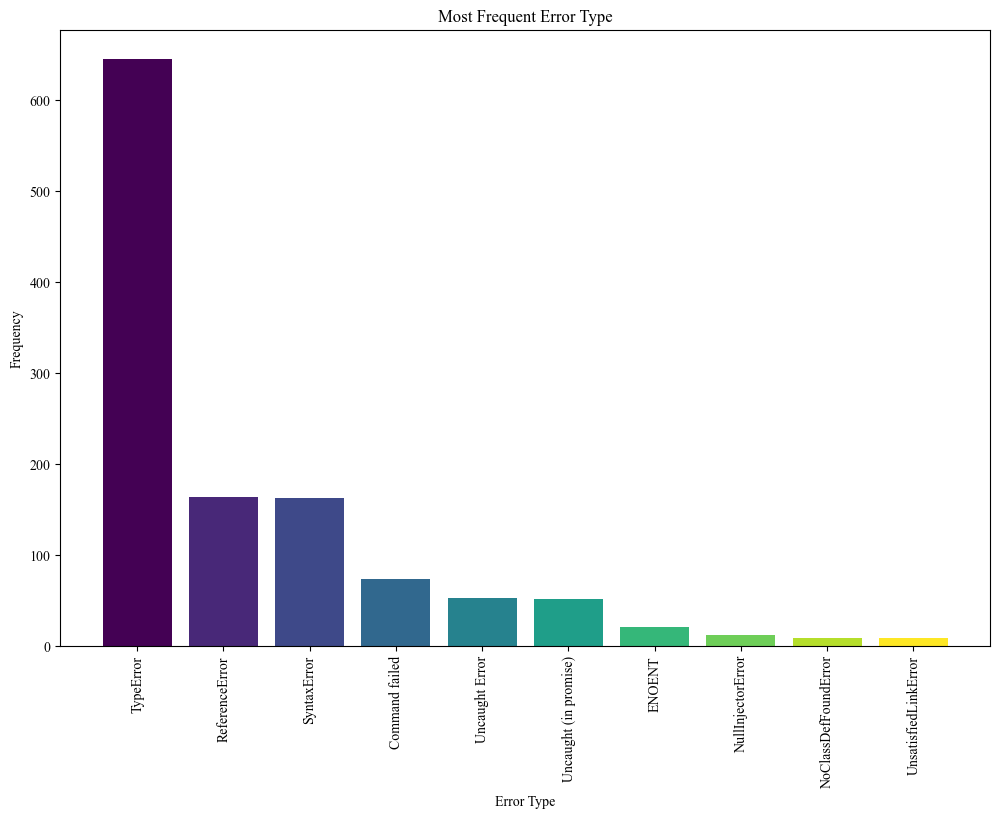

In [339]:
import matplotlib.cm as cm

colors = cm.viridis(np.linspace(0, 1, 10))
library_data = df['Type'].value_counts().head(10)


plt.figure(figsize=(12, 8))
plt.bar(library_data.index, library_data.values,color=colors)
plt.xlabel('Error Type')
plt.ylabel('Frequency')
plt.title('Most Frequent Error Type')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.xticks(rotation=90)
plt.show()

# Counter Plot of Error type

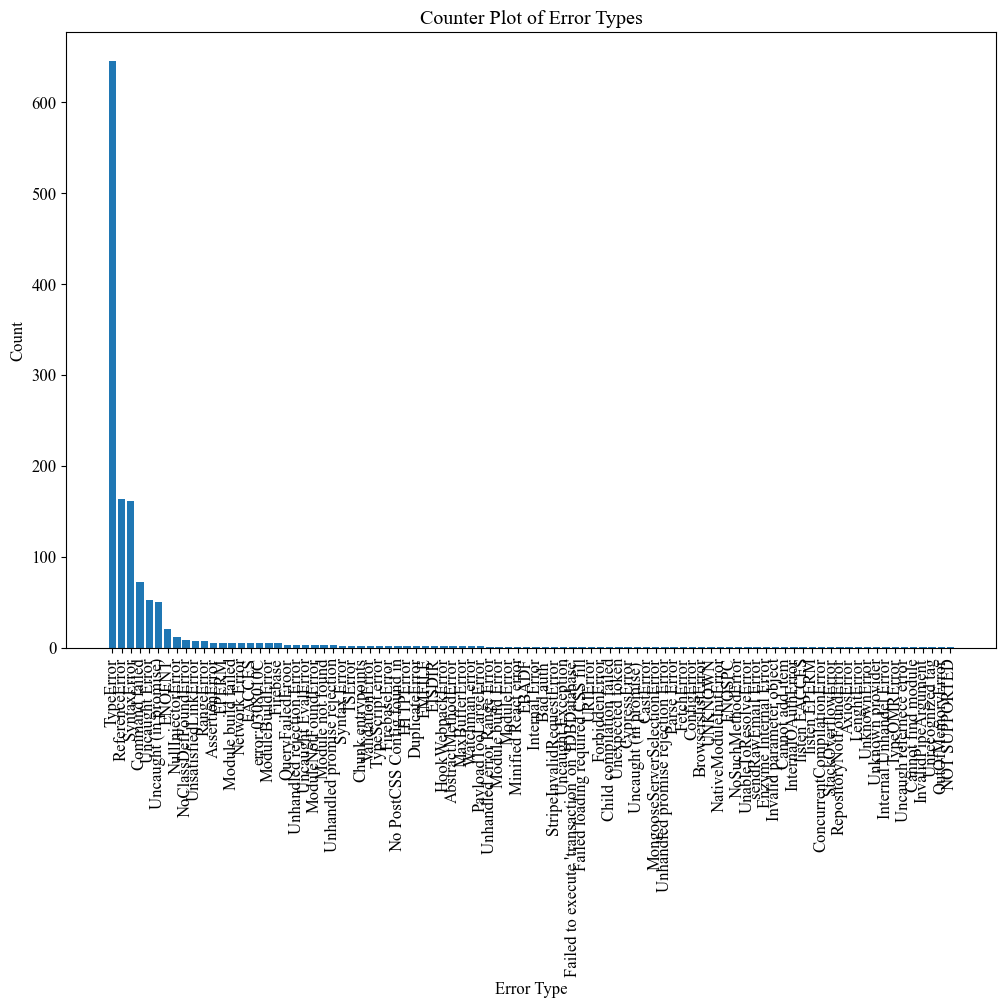

In [238]:
library_data = df['Type'].value_counts()


plt.figure(figsize=(12, 8))
plt.bar(library_data.index, library_data.values)
plt.xlabel('Error Type')
plt.ylabel('Count')
plt.title('Counter Plot of Error Types')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 6
plt.xticks(rotation=90)
plt.show()

In [239]:
Angular=df[df['Library']=='angular']

# Angular  

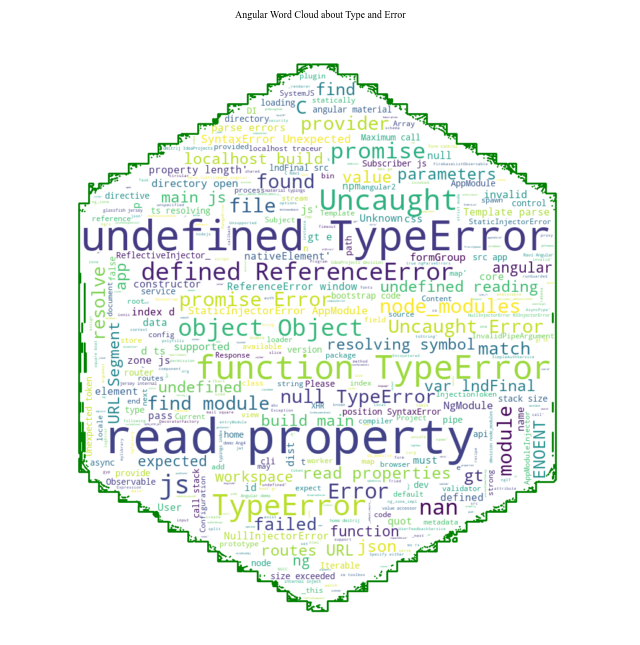

In [241]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in Angular['ErrorType'].tolist()]
text = ' '.join(question_titles)
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap='viridis',background_color='white',mask=nodemask,contour_color="green",contour_width=3,min_font_size=3,max_words=400).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Angular Word Cloud about Type and Error')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

# Angular with only Error

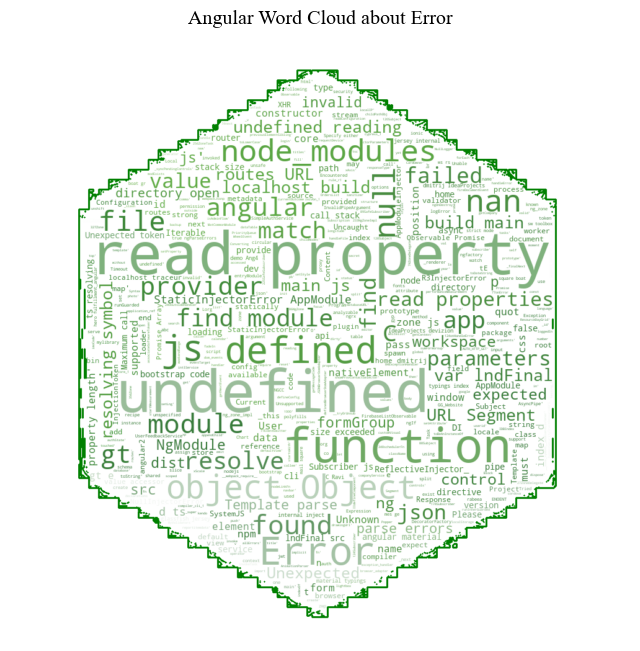

In [243]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in Angular['Error'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'viridis', background_color='white',mask=nodemask,contour_color="green",contour_width=3.0,min_font_size=3,max_words=500).generate(text)
wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Angular Word Cloud about Error')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

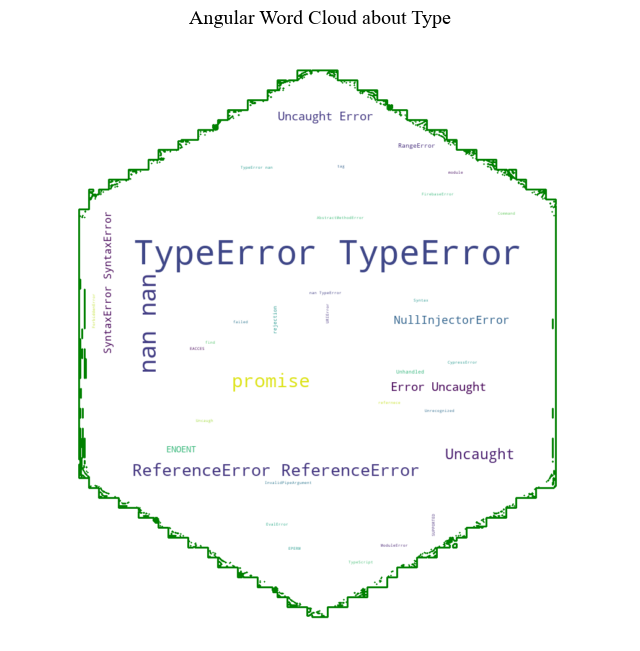

In [244]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in Angular['Type'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'viridis', background_color='white',mask=nodemask,contour_color="green",contour_width=3,min_font_size=3,max_words=500).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Angular Word Cloud about Type')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

# Webpack 

In [246]:
webpack=df[df['Library']=='webpack']

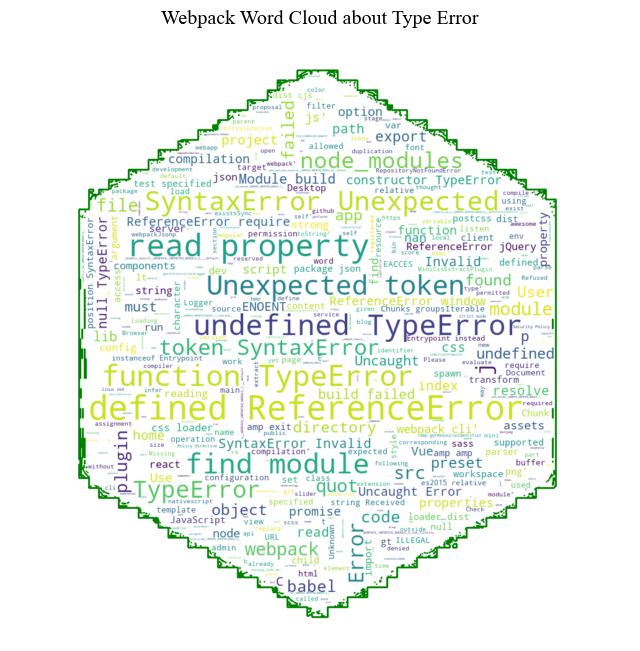

In [247]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in webpack['ErrorType'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'viridis', background_color='white',mask=nodemask,contour_color="green",contour_width=3,min_font_size=3,max_words=400).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Webpack Word Cloud about Type Error')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

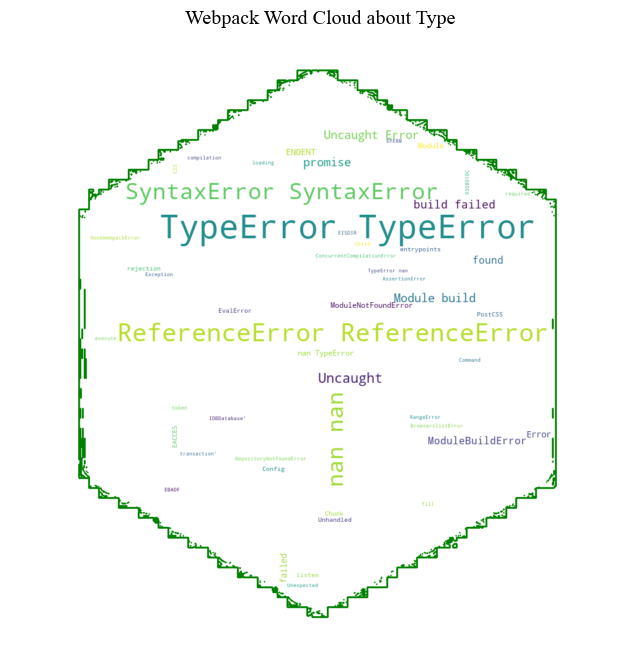

In [248]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in webpack['Type'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'viridis', background_color='white',mask=nodemask,contour_color="green",contour_width=3,min_font_size=3,max_words=500).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Webpack Word Cloud about Type')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

# Webpack with only Error

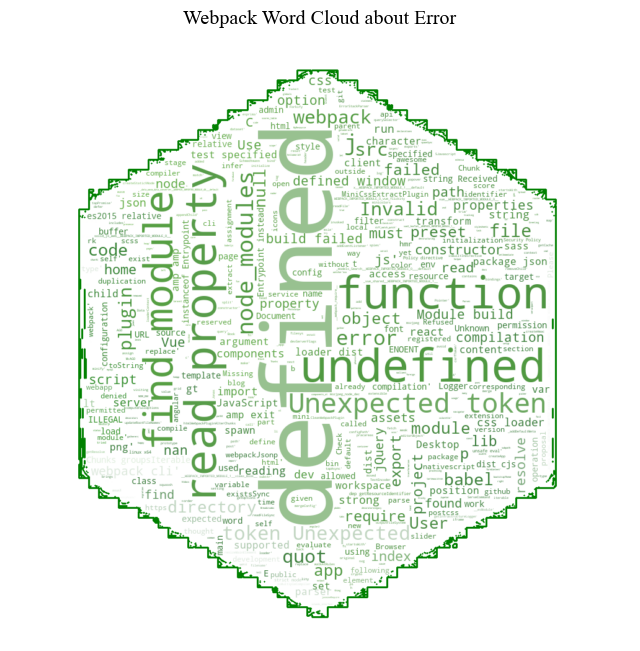

In [250]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in webpack['Error'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'binary', background_color='white',mask=nodemask,contour_color="green",contour_width=3,min_font_size=3,max_words=500).generate(text)
wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Webpack Word Cloud about Error')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

# Typescript 

In [252]:
Typescript=df[df['Library']=='typescript']

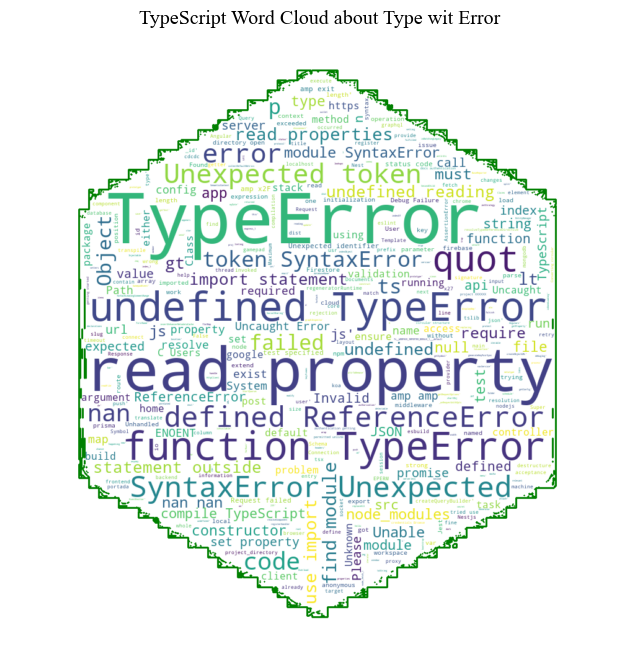

In [253]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in Typescript['ErrorType'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'viridis', background_color='white',mask=nodemask,contour_color="green",contour_width=3,min_font_size=3,max_words=400).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('TypeScript Word Cloud about Type wit Error')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

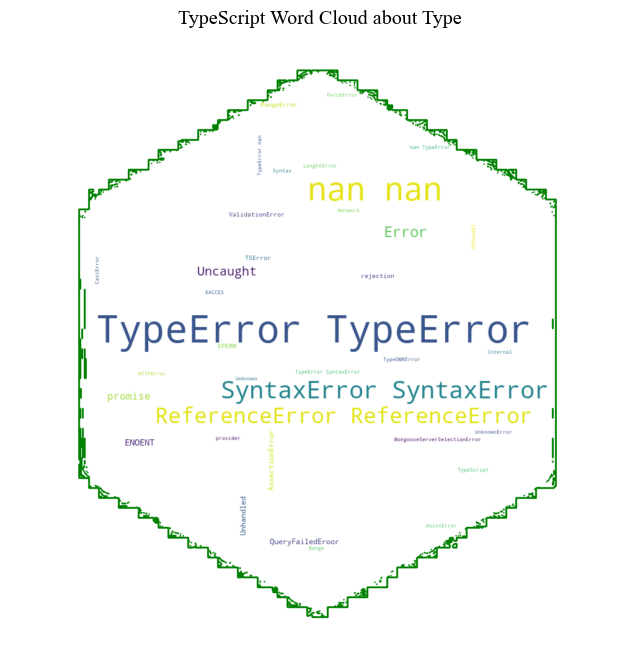

In [254]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in Typescript['Type'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'viridis', background_color='white',mask=nodemask,contour_color="green",contour_width=3,min_font_size=3,max_words=500).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('TypeScript Word Cloud about Type')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

# Type script word cloud about error

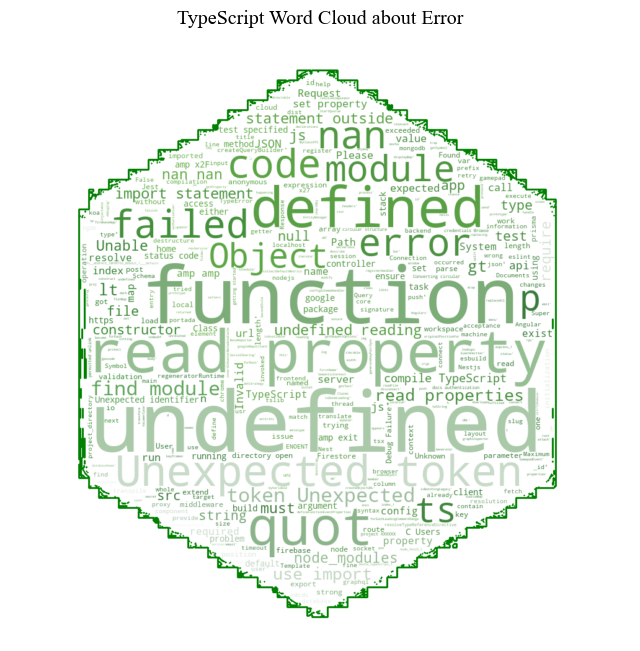

In [256]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in Typescript['Error'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'binary', background_color='white',mask=nodemask,contour_color="green",contour_width=3,min_font_size=3,max_words=400).generate(text)
wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('TypeScript Word Cloud about Error')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

# React Native


In [258]:
react_native=df[df['Library']=='react-native']

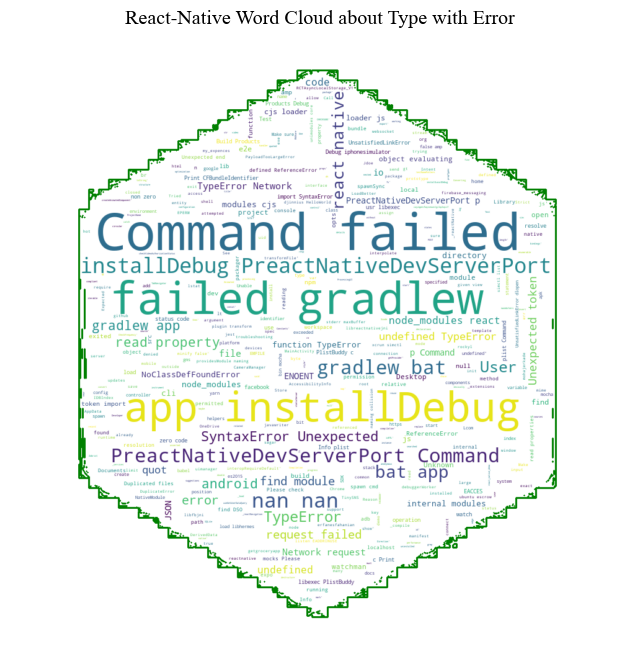

In [259]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in react_native['ErrorType'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'viridis', background_color='white',mask=nodemask,contour_color="green",contour_width=3,min_font_size=3,max_words=400).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('React-Native Word Cloud about Type with Error')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

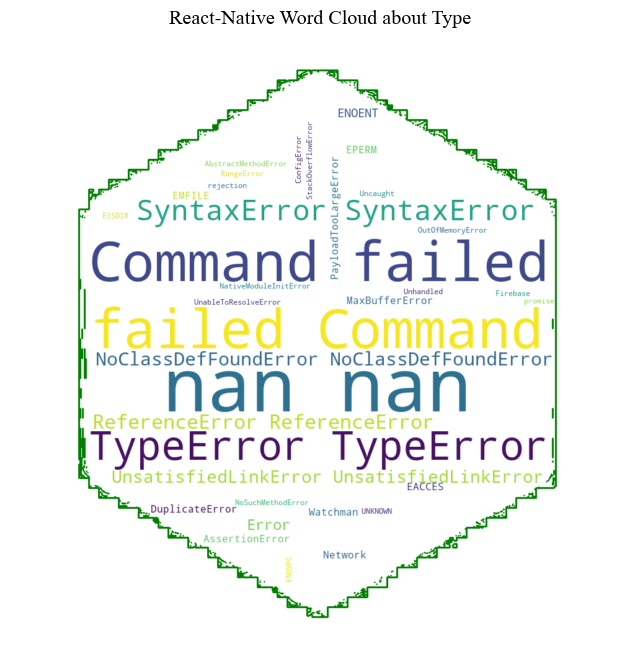

In [260]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in react_native['Type'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'viridis', background_color='white',mask=nodemask,contour_color="green",contour_width=3,min_font_size=3,max_words=500).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('React-Native Word Cloud about Type')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

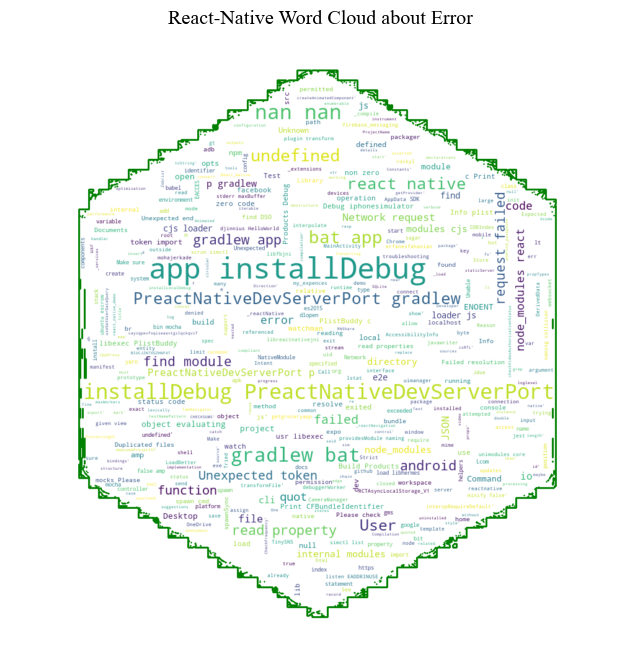

In [261]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in react_native['Error'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'viridis', background_color='white',mask=nodemask,contour_color="green",contour_width=3,min_font_size=3,max_words=400).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('React-Native Word Cloud about Error')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

#  <h1>React-Js</h1>

In [263]:
reactjs=df[df['Library']=='reactjs']

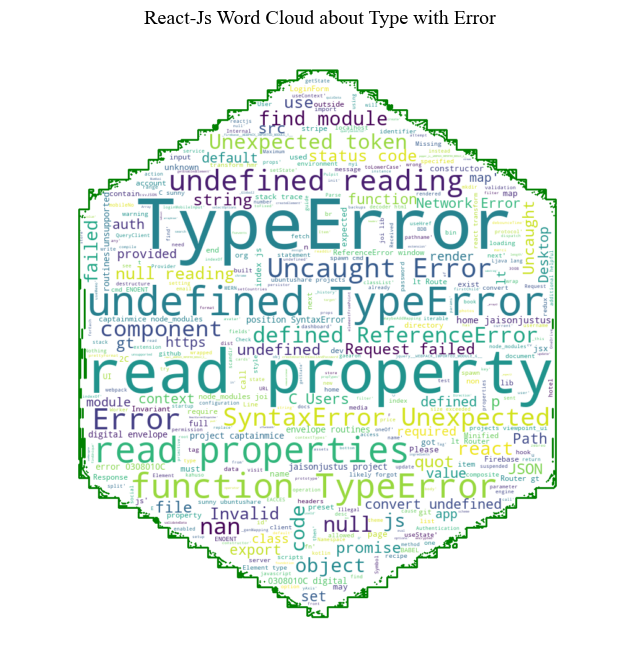

In [264]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in reactjs['ErrorType'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'viridis', background_color='white',mask=nodemask,contour_color="green",contour_width=3,min_font_size=3,max_words=400).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('React-Js Word Cloud about Type with Error')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

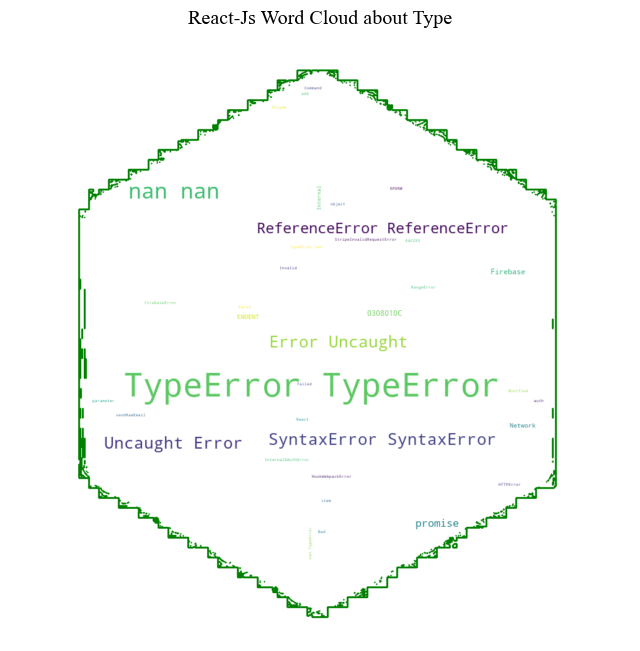

In [265]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in reactjs['Type'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'viridis', background_color='white',mask=nodemask,contour_color="green",contour_width=3,min_font_size=3,max_words=500).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('React-Js Word Cloud about Type')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

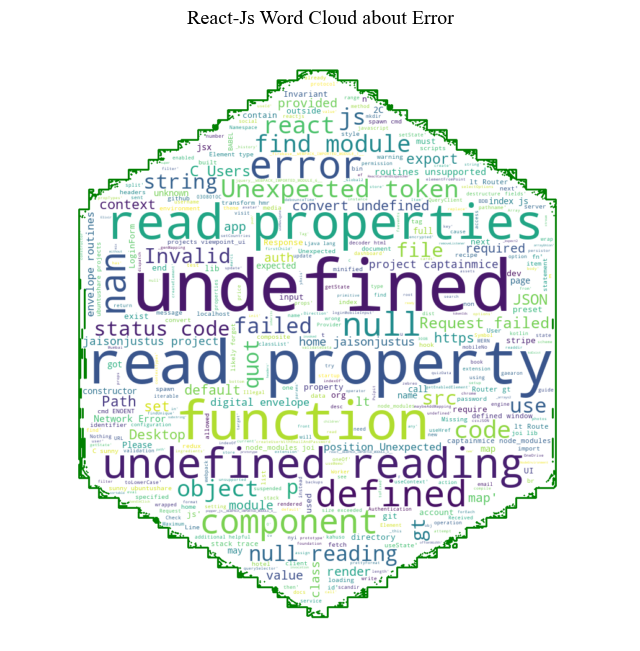

In [266]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in reactjs['Error'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'viridis', background_color='white',mask=nodemask,contour_color="green",contour_width=3,min_font_size=3,max_words=400).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('React-Js Word Cloud about Error')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()